In [115]:
from numpy import  *
import matplotlib.pyplot as plt

In [116]:
def loadDataset(filename):
    dataset=[]
    label=[]
    numFeat=len(open(filename).readline().strip().split(','))-1
    fr=open(filename)
    for line in fr.readlines():
        arr=line.strip().split(',')
        vec=[1]
        for k in range(numFeat):
            vec.append(float(arr[k]))
        dataset.append(vec)
        label.append(int(arr[-1]))
    return dataset,label

In [117]:
dataset,label=loadDataset('ex2data2.txt')

In [118]:
#plot
xcode1=[];ycode1=[]
xcode2=[];ycode2=[]
for i in range(len(dataset)):
    if label[i]==1:
        xcode1.append(dataset[i][1])
        ycode1.append(dataset[i][2])
    else:
        xcode2.append(dataset[i][1])
        ycode2.append(dataset[i][2])  

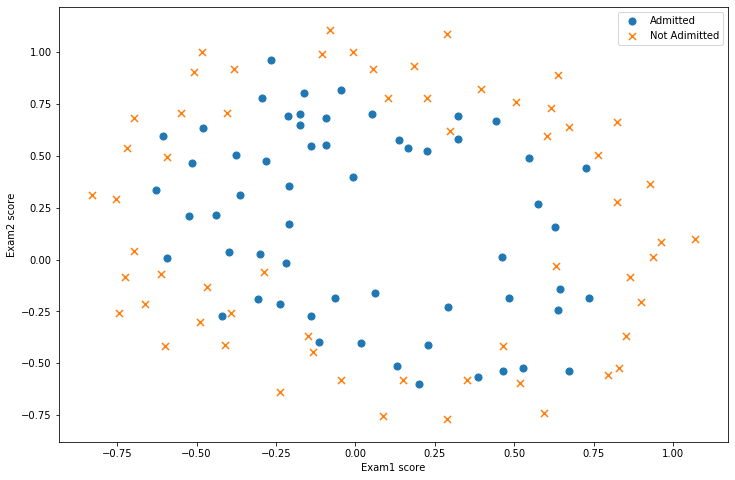

In [119]:
plt.figure(figsize=(12,8))
plt.scatter(xcode1,ycode1,s=50)
plt.scatter(xcode2,ycode2,s=50,marker='x')
plt.legend(('Admitted','Not Adimitted'))
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.show()

In [120]:
# no-linear model transform data
degree=5
newData=[]
x1=array(dataset)[:,1]
x2=array(dataset)[:,2]
for i in range(1,degree):
    for j in range(0,i):
        s=power(x1,i-j)*power(x2,j)
        newData.append(s)

dataset=array(newData).T
dataset=insert(dataset,0,1,axis=1)
dataset

array([[ 1.00000000e+00,  5.12670000e-02,  2.62830529e-03, ...,
         9.42624411e-05,  1.28625106e-03,  1.75514423e-02],
       [ 1.00000000e+00, -9.27420000e-02,  8.60107856e-03, ...,
        -5.46363780e-04,  4.03513411e-03, -2.98012201e-02],
       [ 1.00000000e+00, -2.13710000e-01,  4.56719641e-02, ...,
        -6.75674451e-03,  2.18864648e-02, -7.08946949e-02],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  2.34691802e-01, ...,
        -1.13613445e-01,  2.34349278e-01, -4.83389829e-01],
       [ 1.00000000e+00, -6.33640000e-03,  4.01499650e-05, ...,
        -2.54220521e-07,  4.00913674e-05, -6.32253341e-03],
       [ 1.00000000e+00,  6.32650000e-01,  4.00246023e-01, ...,
        -7.75143736e-03,  3.75068364e-04, -1.81484119e-05]])

In [121]:
def sigmoid(z):
    return 1.0/(1+exp(-z))
sigmoid(0)

0.5

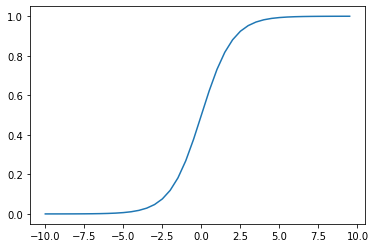

In [122]:
nums=arange(-10,10,0.5)
plt.plot(nums,sigmoid(nums))

In [123]:
def cost(theta,X,y,rate):
    X=mat(X)
    y=mat(y)
    theta=mat(theta)
    first=multiply(-y,log(sigmoid(X*theta.T)))
    second=multiply((1-y),log(1-sigmoid(X*theta.T)))
    reg=rate/(2*len(X))*power(sum(theta[:,1:theta.shape[1]]),2)
    return sum(first-second)/len(X)+reg

In [124]:
X=mat(dataset)
y=mat(label).T
theta=zeros(11)
X.shape,y.shape,theta.shape

((118, 11), (118, 1), (11,))

In [142]:
cost(theta,X,y,1)

0.6931471805599454

In [140]:
def gradient(theta,X,y,rate):
    theta=mat(theta)
    parameters=theta.shape[1]
    grad=zeros(parameters)
  
    error=sigmoid(X*theta.T)-y
    for i in range(parameters):
        temp=multiply(error,X[:,i])
        if i==0:
            grad[i]=sum(temp)/len(X)
        else:
            grad[i]=sum(temp)/len(X)+rate/len(X)*theta[:,i]
    return grad
gradient(theta,X,y,1)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [132]:
import scipy.optimize as opt

In [143]:
result=opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(X,y,1))
result

(array([ 0.50258935,  0.29486839, -1.53254307, -0.59087472,  0.12008187,
        -0.23108022, -0.42117825, -1.15978503,  0.002652  , -0.81796209,
        -0.06900916]), 54, 4)

In [147]:
cost(result[0],X,y,1)

0.6845169371523202

In [145]:
def predict(theta,X):
    pro=sigmoid(X*theta.T)
    return [1 if x>=0.5 else 0 for x in pro]


In [146]:
predictions=predict(mat(result[0]),X)
correct=[1 if(a==b) else 0 for (a,b) in zip(predictions,y)]
accuracy=sum(correct)/(len(correct))
print('accuracy = {}%'.format(accuracy*100))

accuracy = 65.2542372881356%
